<a href="https://colab.research.google.com/github/PochampellyDeekshitha/MachineLearning/blob/main/WEEK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi','pedigree', 'age', 'label']
p=pd.read_csv("diabetes.csv",names=col_names)
p = p.iloc[1:]
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = p[feature_cols]
y = p.label
y = pd.to_numeric(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6926406926406926
Precision: 0.5945945945945946
Recall: 0.5176470588235295
F1 score: 0.5534591194968553


In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8051948051948052
Precision: 0.8225806451612904
Recall: 0.6
F1 score: 0.6938775510204082


compared to decision tree and random forest the accuracy is varied because in dt we take only 1 tree but where as in rf we take certain trees here it doesnt depend on only one tree so we get good better results in rf than dt

In [ ]:
rf=RandomForestClassifier(n_estimators=10)
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.7384615384615385
Recall: 0.5647058823529412
F1 score: 0.64


In [ ]:
rf=RandomForestClassifier(n_estimators=200)
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7835497835497836


In [ ]:
rf=RandomForestClassifier(n_estimators=500)
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7965367965367965


if we take very less or very more estimators the model will not be able to predict the values correctly because there is a chance of overfit and under fit of mode


suppose if we take 10 trees 7 predict wrong and 3 predict correct
so taking very less estimators 10 can cause models to predict valuues some incorrect same apply for very large estimators

if we take estimators with pruning like giving some specifications like max depth height and all then also we can get the accuracy proper but if varies on no.of estimators

Hyperparameter tuning method called grid sv search we get optimal results for a given model

In [ ]:
# 2.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [ ]:
# max voting
from scipy.stats import mode
final_pred_max, _ = mode(np.array([pred1, pred2, pred3]), axis=0)
final_pred_max = final_pred_max.flatten()

In [ ]:
# average voting or prob based voting
prob1 = model1.predict_proba(X_test)[:, 1]
prob2 = model2.predict_proba(X_test)[:, 1]
prob3 = model3.predict_proba(X_test)[:, 1]

avg_prob = (prob1 + prob2 + prob3) / 3
final_pred_avg = [1 if p > 0.5 else 0 for p in avg_prob]

In [ ]:
#weighted average voting
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

total = acc1 + acc2 + acc3
w1, w2, w3 = acc1 / total, acc2 / total, acc3 / total

weighted_prob = (prob1 * w1) + (prob2 * w2) + (prob3 * w3)
final_pred_weighted = [1 if p > 0.5 else 0 for p in weighted_prob]

In [ ]:
print(f"Logistic Regression: {acc1:.4f}")
print(f"Decision Tree: {acc2:.4f}")
print(f"Random Forest: {acc3:.4f}")

Logistic Regression: 0.7359
Decision Tree: 0.7013
Random Forest: 0.7532


In [ ]:
print(f"Max Voting Accuracy: {accuracy_score(y_test, final_pred_max):.4f}")
print(f"Average Voting Accuracy:{accuracy_score(y_test, final_pred_avg):.4f}")
print(f"Weighted Average Voting Accuracy: {accuracy_score(y_test, final_pred_weighted):.4f}")

Max Voting Accuracy: 0.7489
Average Voting Accuracy:0.7359
Weighted Average Voting Accuracy: 0.7359


In [ ]:
print(classification_report(y_test, final_pred_weighted))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       151
           1       0.60      0.70      0.65        80

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



depending on the type of data which we take  max voting avg voting and weighted avg voting differs


avg voting and weighted avg voting are same and max voting is greater

max voting hard voting for classification




soft voting for classification

avg  voting for regression

weighted avg voting regreession and classification

In [ ]:
# 3.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=1000, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)
hard_voting = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3)],voting='hard')
soft_voting = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3)],voting='soft')

In [ ]:
hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

In [ ]:
print("Hard Voting ")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_hard))
print("Classification Report:", classification_report(y_test, y_pred_hard))

Hard Voting 
Accuracy: 0.7186147186147186
Confusion Matrix: [[115  36]
 [ 29  51]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.64      0.61        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



In [ ]:
print("Soft Voting Classifier ")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_soft))
print("Classification Report:", classification_report(y_test, y_pred_soft))

Soft Voting Classifier 
Accuracy: 0.70995670995671
Confusion Matrix: [[112  39]
 [ 28  52]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.65      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



In [ ]:
# 4.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
estimators = [10, 50, 100, 200]
max_depths = [None, 5, 10, 15]
random_states = [0, 42, 100]

results = []
for est in estimators:
    for depth in max_depths:
        for rs in random_states:
            rf = RandomForestClassifier(n_estimators=est,max_depth=depth,random_state=rs)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append((est, depth, rs, acc))

In [ ]:
results_df = pd.DataFrame(results, columns=['n_estimators', 'max_depth', 'random_state', 'accuracy'])
print("Random Forest Parameter Exploration Results ")
print(results_df)

Random Forest Parameter Exploration Results 
    n_estimators  max_depth  random_state  accuracy
0             10        NaN             0  0.731602
1             10        NaN            42  0.740260
2             10        NaN           100  0.757576
3             10        5.0             0  0.718615
4             10        5.0            42  0.753247
5             10        5.0           100  0.735931
6             10       10.0             0  0.748918
7             10       10.0            42  0.727273
8             10       10.0           100  0.735931
9             10       15.0             0  0.744589
10            10       15.0            42  0.757576
11            10       15.0           100  0.761905
12            50        NaN             0  0.731602
13            50        NaN            42  0.740260
14            50        NaN           100  0.753247
15            50        5.0             0  0.753247
16            50        5.0            42  0.744589
17            50   

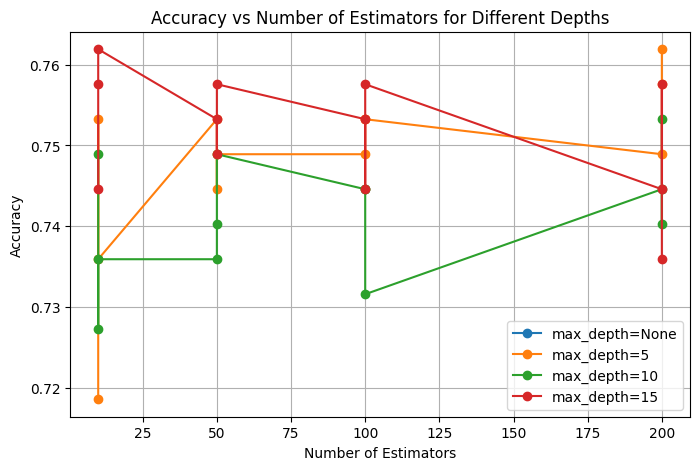

In [ ]:
plt.figure(figsize=(8,5))
for depth in max_depths:
    subset = results_df[results_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f"max_depth={depth}")
plt.title("Accuracy vs Number of Estimators for Different Depths")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best = results_df.loc[results_df['accuracy'].idxmax()]
best_params = (int(best['n_estimators']), best['max_depth'], int(best['random_state']))
print("Best Parameters Found:")
print(f"n_estimators = {best_params[0]}, max_depth = {best_params[1]}, random_state = {best_params[2]}")


Best Parameters Found:
n_estimators = 10, max_depth = 15.0, random_state = 100


In [ ]:
rf_best = RandomForestClassifier(
    n_estimators=best_params[0],
    max_depth=int(best_params[1]),
    random_state=best_params[2]
)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.60      0.64        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [1]:
#5.
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    bootstrap=True
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("OOB Score (R² using out-of-bag samples):", round(rf.oob_score_, 3))
print("Test R² Score (using test set):", round(r2_score(y_test, y_pred), 3))

OOB Score (R² using out-of-bag samples): 0.446
Test R² Score (using test set): 0.443


In [4]:
# 6.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = load_diabetes()
X = data.data
y = data.target
# Adaptive Boosting (AdaBoost) - Binary Classification
y_binary = np.where(y > np.median(y), 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)
print("=== AdaBoost (Binary Classification) ===")
print("Accuracy:", round(ada_acc, 3))
print("Explanation: AdaBoost combines weak learners (decision stumps) sequentially,")
print("focusing more on misclassified samples in each iteration.\n")

# PART 2: Gradient Boosting - Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("=== Gradient Boosting (Regression) ===")
print("R² Score:", round(r2_score(y_test, y_pred_gbr), 3))
print("Explanation: Gradient Boosting builds trees sequentially to minimize loss,")
print("where each new tree corrects the residual errors of the previous trees.\n")

#XGBoost - Regression
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("=== XGBoost (Regression) ===")
print("R² Score:", round(r2_score(y_test, y_pred_xgb), 3))
print("Explanation: XGBoost improves Gradient Boosting with regularization,")
print("parallel computation, and better handling of overfitting.\n")

# CatBoost - Regression
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("=== CatBoost (Regression) ===")
print("R² Score:", round(r2_score(y_test, y_pred_cat), 3))
print("Explanation: CatBoost uses ordered boosting and efficient handling of categorical features,")
print("reducing overfitting and training time compared to XGBoost.\n")


=== AdaBoost (Binary Classification) ===
Accuracy: 0.708
Explanation: AdaBoost combines weak learners (decision stumps) sequentially,
focusing more on misclassified samples in each iteration.

=== Gradient Boosting (Regression) ===
R² Score: 0.437
Explanation: Gradient Boosting builds trees sequentially to minimize loss,
where each new tree corrects the residual errors of the previous trees.

=== XGBoost (Regression) ===
R² Score: 0.33
Explanation: XGBoost improves Gradient Boosting with regularization,
parallel computation, and better handling of overfitting.

=== CatBoost (Regression) ===
R² Score: 0.452
Explanation: CatBoost uses ordered boosting and efficient handling of categorical features,
reducing overfitting and training time compared to XGBoost.



In [3]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [5]:
# 7.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
results = []

# Bagging Regressor
bag = BaggingRegressor(n_estimators=100, random_state=42)
start = time.time()
bag.fit(X_train, y_train)
train_time = time.time() - start
r2_train = bag.score(X_train, y_train)
r2_test = r2_score(y_test, bag.predict(X_test))
results.append(["Bagging", r2_train, r2_test, train_time])

#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
start = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - start
r2_train = rf.score(X_train, y_train)
r2_test = r2_score(y_test, rf.predict(X_test))
results.append(["Random Forest", r2_train, r2_test, train_time])

# AdaBoost Regressor
ada = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
start = time.time()
ada.fit(X_train, y_train)
train_time = time.time() - start
r2_train = ada.score(X_train, y_train)
r2_test = r2_score(y_test, ada.predict(X_test))
results.append(["AdaBoost", r2_train, r2_test, train_time])

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
start = time.time()
gbr.fit(X_train, y_train)
train_time = time.time() - start
r2_train = gbr.score(X_train, y_train)
r2_test = r2_score(y_test, gbr.predict(X_test))
results.append(["Gradient Boosting", r2_train, r2_test, train_time])

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4,
                   random_state=42, objective='reg:squarederror')
start = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start
r2_train = xgb.score(X_train, y_train)
r2_test = r2_score(y_test, xgb.predict(X_test))
results.append(["XGBoost", r2_train, r2_test, train_time])

# CatBoost Regressor
cat = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6,
                        verbose=0, random_state=42)
start = time.time()
cat.fit(X_train, y_train)
train_time = time.time() - start
r2_train = cat.score(X_train, y_train)
r2_test = r2_score(y_test, cat.predict(X_test))
results.append(["CatBoost", r2_train, r2_test, train_time])
df = pd.DataFrame(results, columns=["Model", "Train R²", "Test R²", "Training Time (s)"])
print("=== COMPARATIVE STUDY OF ENSEMBLE MODELS ===\n")
print(df)


=== COMPARATIVE STUDY OF ENSEMBLE MODELS ===

               Model  Train R²   Test R²  Training Time (s)
0            Bagging  0.924609  0.439264           1.109118
1      Random Forest  0.924216  0.442823           0.546890
2           AdaBoost  0.625204  0.468887           0.493673
3  Gradient Boosting  0.926155  0.436649           0.319365
4            XGBoost  0.994449  0.329684           0.151161
5           CatBoost  0.971349  0.451538           0.434536


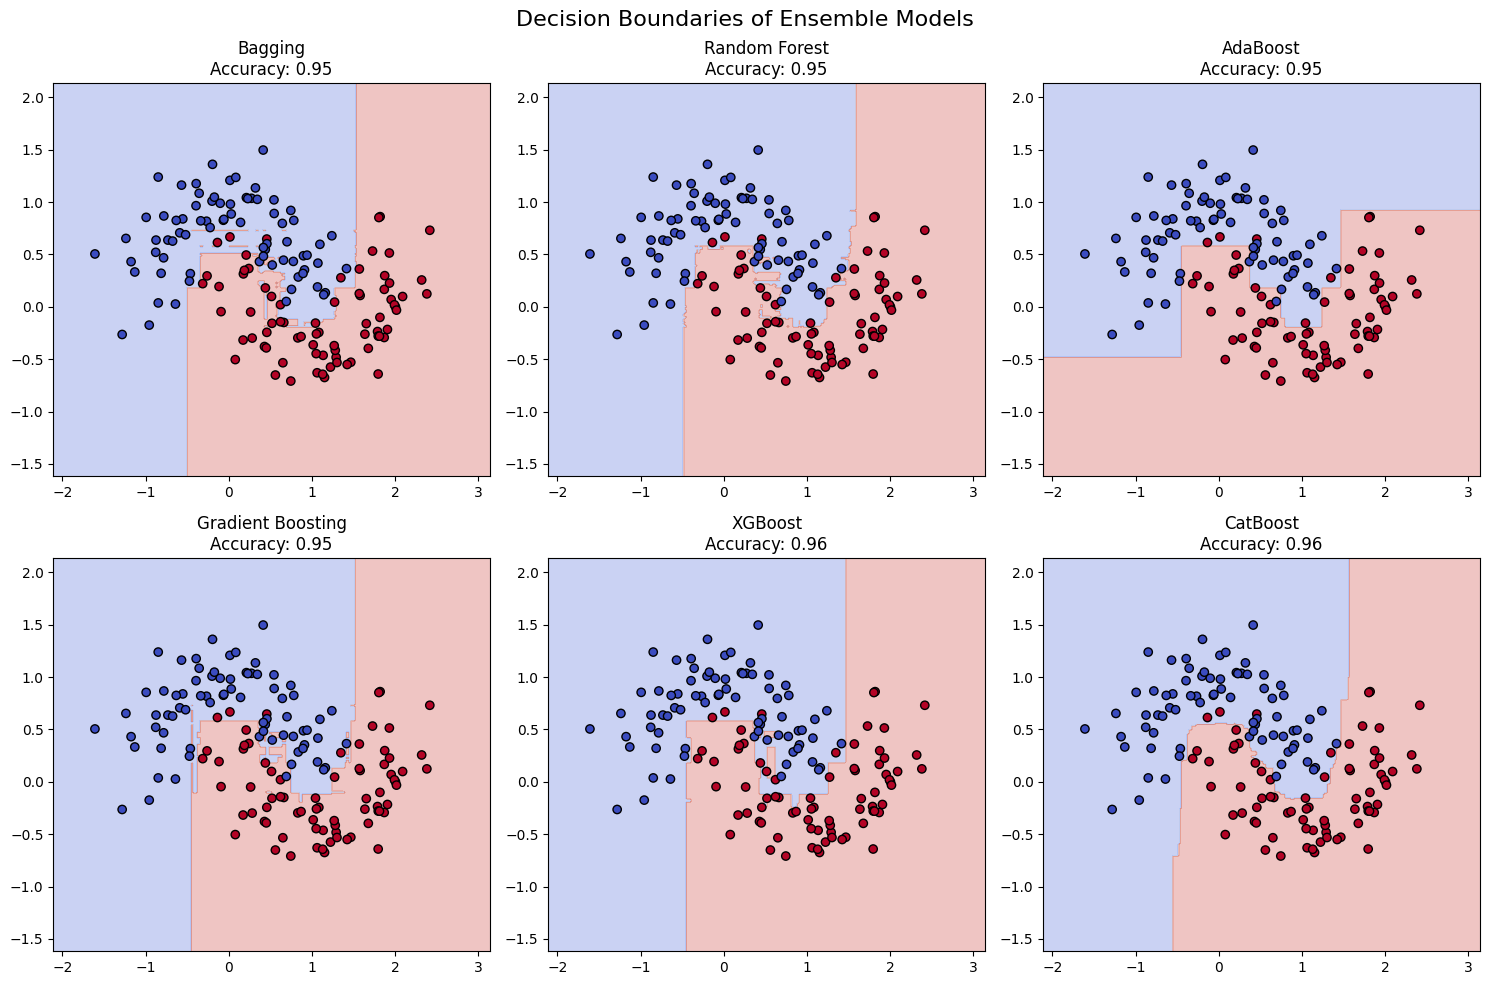

In [6]:
# 8.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
}
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    acc = accuracy_score(y_test, model.predict(X_test))
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
    plt.title(f"{name}\nAccuracy: {acc:.2f}")
plt.suptitle("Decision Boundaries of Ensemble Models", fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
# 9.
import time
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = load_diabetes()
X = data.data
y = np.where(data.target > data.target.mean(), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, kernel='rbf', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('DecisionTree', dt), ('KNN', knn), ('LogReg', lr), ('SVM', svm)],
    voting='soft'
)

start_time = time.time()
voting_clf.fit(X_train, y_train)
train_time_voting = time.time() - start_time

y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("=== Heterogeneous Ensemble (Voting Classifier) ===")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Training Time: {train_time_voting:.4f} seconds")
print(classification_report(y_test, y_pred_voting))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)


start_time = time.time()
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

start_time = time.time()
bagging.fit(X_train, y_train)
train_time_bagging = time.time() - start_time
y_pred_bagging = bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

results = pd.DataFrame({
    'Model': ['Voting (Heterogeneous)', 'Random Forest', 'Bagging'],
    'Accuracy': [accuracy_voting, acc_rf, acc_bagging],
    'Training Time (s)': [train_time_voting, train_time_rf, train_time_bagging]
})

print("\n=== Model Comparison ===")
print(results)


=== Heterogeneous Ensemble (Voting Classifier) ===
Accuracy: 0.7594
Training Time: 0.0434 seconds
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        75
           1       0.77      0.64      0.70        58

    accuracy                           0.76       133
   macro avg       0.76      0.75      0.75       133
weighted avg       0.76      0.76      0.76       133


=== Model Comparison ===
                    Model  Accuracy  Training Time (s)
0  Voting (Heterogeneous)  0.759398           0.043402
1           Random Forest  0.744361           0.232674
2                 Bagging  0.766917           0.179337


In [9]:
# 10.
import time
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [10]:
data = load_diabetes()
X = data.data
y = np.where(data.target > data.target.mean(), 1, 0)  # Convert regression target to binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for models like SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True, kernel='rbf', random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)


In [12]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [13]:
voting = VotingClassifier(
    estimators=[('DecisionTree', dt), ('KNN', knn), ('SVM', svm), ('LogReg', lr)],
    voting='soft'
)

stacking = StackingClassifier(
    estimators=[('DecisionTree', dt), ('KNN', knn), ('SVM', svm)],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

In [17]:
models = {
    "Bagging (Homogeneous)": bagging,
    "Random Forest (Homogeneous)": rf,
    "Voting (Heterogeneous)": voting,
    "Stacking (Heterogeneous)": stacking
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Training Time (s)': train_time
    })

    print(f"{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")
    print(classification_report(y_test, y_pred))


Bagging (Homogeneous)
Accuracy: 0.7669
Training Time: 0.2044 seconds
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.76      0.67      0.72        58

    accuracy                           0.77       133
   macro avg       0.77      0.76      0.76       133
weighted avg       0.77      0.77      0.76       133

Random Forest (Homogeneous)
Accuracy: 0.7444
Training Time: 0.2192 seconds
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        75
           1       0.74      0.64      0.69        58

    accuracy                           0.74       133
   macro avg       0.74      0.73      0.73       133
weighted avg       0.74      0.74      0.74       133

Voting (Heterogeneous)
Accuracy: 0.7594
Training Time: 0.0317 seconds
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        75
           1       0.77

In [16]:
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("Ensemble Model Comparison")
print(df_results)

Ensemble Model Comparison
                         Model  Accuracy  Training Time (s)
0        Bagging (Homogeneous)  0.766917           0.610610
2       Voting (Heterogeneous)  0.759398           0.141376
1  Random Forest (Homogeneous)  0.744361           0.506442
3     Stacking (Heterogeneous)  0.744361           0.297446
